Fatemeh Amanian

Train neural network models (at least two different networks for each dataset, i.e., no. layers, no. neurons, activation, ...) in either Tensorflow or Pytorch to perform classification on the following datasets:

Fashion-MNIST

In [1]:
import sys
from matplotlib import pyplot
import numpy as np
import PIL

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

Download the data:

In [2]:
from keras.datasets import fashion_mnist
x = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
!ls /root/.keras/datasets/

fashion-mnist


In [4]:
!mkdir /content/data
!mkdir /content/data/fmnist
!mv  -v /root/.keras/datasets/fashion-mnist/* /content/data/fmnist

renamed '/root/.keras/datasets/fashion-mnist/t10k-images-idx3-ubyte.gz' -> '/content/data/fmnist/t10k-images-idx3-ubyte.gz'
renamed '/root/.keras/datasets/fashion-mnist/t10k-labels-idx1-ubyte.gz' -> '/content/data/fmnist/t10k-labels-idx1-ubyte.gz'
renamed '/root/.keras/datasets/fashion-mnist/train-images-idx3-ubyte.gz' -> '/content/data/fmnist/train-images-idx3-ubyte.gz'
renamed '/root/.keras/datasets/fashion-mnist/train-labels-idx1-ubyte.gz' -> '/content/data/fmnist/train-labels-idx1-ubyte.gz'


In [5]:
!gunzip /content/data/fmnist/*.gz

Import data:

In [6]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images-idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

path='./data/fmnist'
train_data, train_labels = loadMNIST( "train", path)
test_data, test_labels = loadMNIST( "t10k", path)

print(train_data.shape)
print(len(train_labels))

print(test_data.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [7]:
classes = [ 'Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot' ]

Normalization:

In [8]:
train_set = ((train_data[..., np.newaxis]/255.0), np.asarray(train_labels))
test_set = (test_data[..., np.newaxis]/255.0, np.asarray(test_labels))
# (x_train-x_train.mean())/x_train.std()
print(train_set[0].shape, train_set[1].shape)
print(test_set[0].shape, test_set[1].shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


Boot


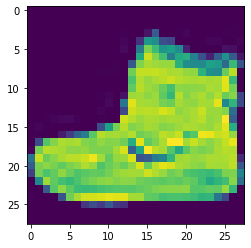

In [9]:
pyplot.imshow(np.squeeze(train_set[0][0]))
print(classes[train_set[1][0]])

Define a Convolutional Neural Network

In [10]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

Define a Loss function and optimizer

In [11]:
# compile model
opt1 = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize

In [12]:
epochs=30
# fit model
history1 = model1.fit(train_set[0], train_set[1], epochs=epochs, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc1 = model1.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc1 * 100.0))

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.5320 - accuracy: 0.8141 - val_loss: 0.4176 - val_accuracy: 0.8561
Epoch 2/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3746 - accuracy: 0.8688 - val_loss: 0.3661 - val_accuracy: 0.8737
Epoch 3/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3317 - accuracy: 0.8834 - val_loss: 0.3393 - val_accuracy: 0.8809
Epoch 4/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3022 - accuracy: 0.8927 - val_loss: 0.3258 - val_accuracy: 0.8847
Epoch 5/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2799 - accuracy: 0.8999 - val_loss: 0.3153 - val_accuracy: 0.8871
Epoch 6/30
938/938 [==============================] - 4s 4ms/step - loss: 0.2646 - accuracy: 0.9045 - val_loss: 0.3490 - val_accuracy: 0.8765
Epoch 7/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2484 - accuracy: 0.9100 - val_loss: 0.2920 - val_accuracy: 0.8922
Epoch 

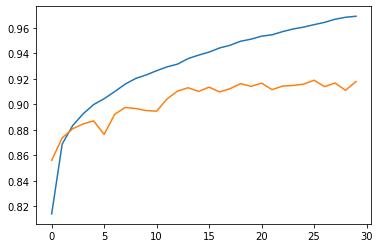

In [13]:
pyplot.plot(range(0,epochs), history1.history['accuracy'])
pyplot.plot(range(0,epochs), history1.history['val_accuracy'])

Model 2:

In [16]:
from tensorflow.keras.layers import Dropout
model2 = Sequential()
model2.add(Conv2D(32, (6, 6), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(198, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))
# compile model
opt2 = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
epochs2=30
# fit model
history2 = model2.fit(train_set[0], train_set[1], epochs=30, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc2 = model2.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc2 * 100.0))

Epoch 1/30
938/938 [==============================] - 5s 6ms/step - loss: 0.6666 - accuracy: 0.7643 - val_loss: 0.4436 - val_accuracy: 0.8432
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.4579 - accuracy: 0.8392 - val_loss: 0.3904 - val_accuracy: 0.8602
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.4105 - accuracy: 0.8545 - val_loss: 0.3623 - val_accuracy: 0.8687
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.3801 - accuracy: 0.8652 - val_loss: 0.3414 - val_accuracy: 0.8766
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.3576 - accuracy: 0.8734 - val_loss: 0.3337 - val_accuracy: 0.8807
Epoch 6/30
938/938 [==============================] - 5s 6ms/step - loss: 0.3393 - accuracy: 0.8792 - val_loss: 0.3154 - val_accuracy: 0.8842
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.3274 - accuracy: 0.8827 - val_loss: 0.3089 - val_accuracy: 0.8873
Epoch 

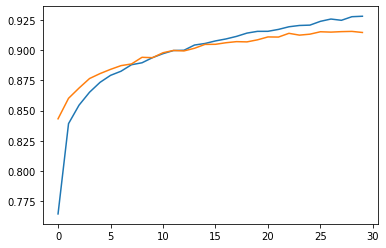

In [18]:
pyplot.plot(range(0,epochs2), history2.history['accuracy'])
pyplot.plot(range(0,epochs2), history2.history['val_accuracy'])

Looks like adding dropouts decreased the distance between training and test accuracy. It's probably because the model don't overfit to the training data.